# SAFT equations of state

In [1]:
using Pkg
Pkg.activate("..")
using Clapeyron, PyCall
import PyPlot; const plt = PyPlot

  Activating project at `~/Library/CloudStorage/OneDrive-ImperialCollegeLondon/University/UROP/SAFT_codes/Clapeyron`


PyPlot

In this notebook, we give examples of how one can use SAFT-type equations in `Clapeyron.jl`. These are not as customisable as their cubic counter-parts, with the exception of the CPA equation of state.

## Vapour-liquid envelope of methanol

As a first example, we use methanol to illustrate the shear number of SAFT-type equations of state available in `Clapeyron.jl`. Methanol was picked as it is a species which requires the use of all the terms in the SAFT equation.

First we generate the models:

In [2]:
model1 = ogSAFT(["methanol"])
model2 = CKSAFT(["methanol"])
model3 = sCKSAFT(["methanol"])
model4 = softSAFT(["methanol"])
model5 = CPA(["methanol"])
model6 = PCSAFT(["methanol"])
model7 = SAFTVRMie(["methanol"])

models = [model1,model2,model3,model4,model5,model6,model7];

We can now obtain the VLE envelope of methanol. We first need the critical point which can be obtained using `crit_pure`:

In [3]:
crit = crit_pure.(models);

Subsequently, we can obtain the saturation curve using `saturation_pressure`:

In [5]:
T = []
p = []
v_l = []
v_v = []
for i ∈ 1:7
    append!(T,[range(400,crit[i][1],length=100)])
    sat = saturation_pressure.(models[i],T[i])
    append!(p,[[sat[i][1] for i ∈ 1:100]])
    append!(v_l,[[sat[i][2] for i ∈ 1:100]])
    append!(v_v,[[sat[i][3] for i ∈ 1:100]])
end

Collecting some data from the NIST Chemistry Webbook:

In [6]:
T_exp = [400,405,410,415,420,425,430,435,440,445,450,455,460,465,470,475,480,485,490,495,500,505,510,512.6]

ρ_l_exp = [21.178,20.973,20.761,20.542,20.315,20.079,19.834,19.579,19.313,19.034,18.741,18.432,18.106,17.759,17.388,16.989,16.553,16.071,15.524,14.88,14.092,13.118,11.689,8.6]

ρ_v_exp = [0.27259,0.31179,0.35583,0.40525,0.46071,0.52289,0.59256,0.67055,0.75766,0.85465,0.96219,1.0809,1.2115,1.3555,1.5154,1.6969,1.9102,2.1742,2.5083,2.905,3.4293,4.1468,5.1706,8.6];

Plotting:

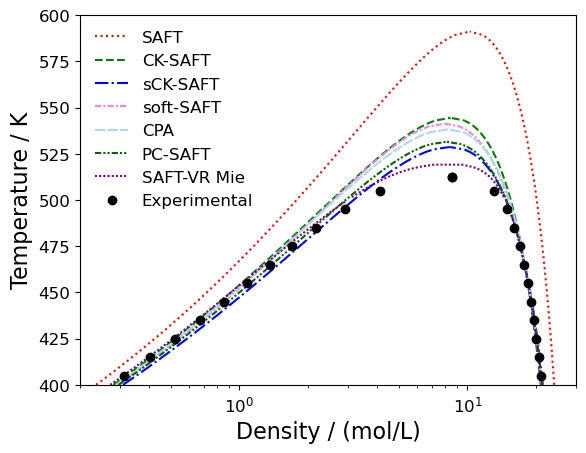

In [8]:
plt.clf()
plt.semilogx(1e-3 ./v_l[1],T[1],label="SAFT",linestyle=":",color="r")
plt.semilogx(1e-3 ./v_v[1],T[1],label="",linestyle=":",color="r")
plt.semilogx(1e-3 ./v_l[2],T[2],label="CK-SAFT",linestyle="--",color="g")
plt.semilogx(1e-3 ./v_v[2],T[2],label="",linestyle="--",color="g")
plt.semilogx(1e-3 ./v_l[3],T[3],label="sCK-SAFT",linestyle="-.",color="b")
plt.semilogx(1e-3 ./v_v[3],T[3],label="",linestyle="-.",color="b")
plt.semilogx(1e-3 ./v_l[4],T[4],label="soft-SAFT",linestyle=(0, (3, 1, 1, 1)),color="violet")
plt.semilogx(1e-3 ./v_v[4],T[4],label="",linestyle=(0, (3, 1, 1, 1)),color="violet")
plt.semilogx(1e-3 ./v_l[5],T[5],label="CPA",linestyle=(0, (5, 1)),color="lightblue")
plt.semilogx(1e-3 ./v_v[5],T[5],label="",linestyle=(0, (5, 1)),color="lightblue")
plt.semilogx(1e-3 ./v_l[6],T[6],label="PC-SAFT",linestyle=(0, (3, 1, 1, 1, 1, 1)),color="darkgreen")
plt.semilogx(1e-3 ./v_v[6],T[6],label="",linestyle=(0, (3, 1, 1, 1, 1, 1)),color="darkgreen")
plt.semilogx(vcat(1e-3 ./v_l[7][1:end-4],1e-3 ./reverse(v_v[7][1:end-4])),vcat(T[7][1:end-4],reverse(T[7][1:end-4])),linestyle=(0, (1, 1)),label="SAFT-VR Mie",color="purple")

plt.semilogx(ρ_l_exp[2:2:end],T_exp[2:2:end],label="Experimental",marker="o",linestyle="",color="k")
plt.semilogx(ρ_v_exp[2:2:end],T_exp[2:2:end],label="",marker="o",linestyle="",color="k")

plt.legend(loc="upper left",frameon=false,fontsize=12) 
plt.xlabel("Density / (mol/L)",fontsize=16)
plt.ylabel("Temperature / K",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([2e-1,3e1])
plt.ylim([400,600])
display(plt.gcf())

As we can see above, for most of the envelope, the different SAFT equations are almost equivalent. The exception is the original SAFT equation where, despite implementing the equation as presented in the original paper, the results could not be replicated. The reason for this is because this equation of state was parameterised with a reference model not presented in that paper. Furthermore, the only appreciable difference between the different equations of state is near the critical point where, as is the nature of SAFT-type equations, they over-estimate it. The best of these is SAFT-VR Mie, primarily because it uses a third-order Barker-Henderson expansion instead of second order.

## $p-xy$ diagram of carbon dioxide + water

With carbon capture becoming a very popular technology for combating climate change, the carbon dioxide + water system is one the developers of the various SAFT equations have worked hard to characterise accurately.

We use this system as an example of how one can customise the simplified CPA (and thus the CPA) equation of state; all the aspects which can be customised in the cubic equations of state can also be applied here. Below, we change the reference equation of state is sCPA from SRK to PR using the optional argument `cubicmodel`:

In [9]:
model1 = sCPA(["carbon dioxide","water"])
model2 = sCPA(["carbon dioxide","water"];cubicmodel=PR)
model3 = PCSAFT(["carbon dioxide","water"])
model4 = SAFTVRMie(["carbon dioxide","water"])

models = [model1,model2,model3,model4];

Generating the $p-xy$ envelope using the `bubble_pressure` function:

In [10]:
T = 323.15
x = range(1e-8,0.037,length=200)
X = Clapeyron.FractionVector.(x)

y = []
p = []
for i ∈ 1:4
    bub = []
    v0 =[]
    for j ∈ 1:200
        if j==1
            append!(bub, [bubble_pressure(models[i],T,X[j])])
            v0 = [log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
        else
            append!(bub, [bubble_pressure(models[i],T,X[j];v0=v0)])
            v0 = [log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
        end
    end
    append!(y,[append!([bub[i][4][1] for i ∈ 1:200],reverse(x))])
    append!(p,[append!([bub[i][1] for i ∈ 1:200],[bub[i][1] for i ∈ 200:-1:1])])
end

The above is an example of how one can generate these figures quickly (and smoothly). We can re-use the solution from the previous iteration as an initial guess to the next iteration.

Plotting:

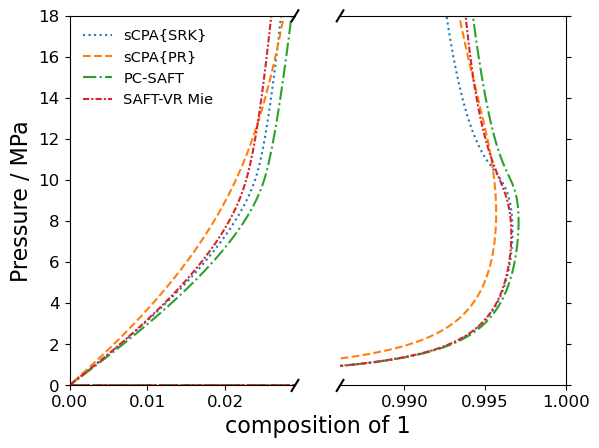

In [11]:
plt.clf()
f,(ax,ax2) = plt.subplots(1,2,sharey=true, facecolor="w")

# plot the same data on both axes
ax.plot(y[1],p[1]./1e6,label="sCPA{SRK}",linestyle=":")
ax.plot(y[2],p[2]./1e6,label="sCPA{PR}",linestyle="--")
ax.plot(y[3],p[3]./1e6,label="PC-SAFT",linestyle="-.")
ax.plot(y[4],p[4]./1e6,label="SAFT-VR Mie",linestyle=(0, (3, 1, 1, 1)))

ax2.plot(y[1],p[1]./1e6,label="",linestyle=":")
ax2.plot(y[2],p[2]./1e6,label="",linestyle="--")
ax2.plot(y[3],p[3]./1e6,label="",linestyle="-.")
ax2.plot(y[4],p[4]./1e6,label="",linestyle=(0, (3, 1, 1, 1)))

ax.set_xlim(0,0.029)
ax.set_ylim(0,18.)
ax2.set_xlim(0.986,1.)
ax2.set_ylim(0,18.)

# hide the spines between ax and ax2
ax.spines["right"].set_visible(false)
ax2.spines["left"].set_visible(false)
ax.yaxis.tick_left()
ax2.yaxis.tick_right()

d = 0.015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
ax.plot((1-d,1+d), (-d,+d), transform=ax.transAxes, color="k", clip_on=false)
ax.plot((1-d,1+d),(1-d,1+d), transform=ax.transAxes, color="k", clip_on=false)

ax2.plot((-d,+d), (1-d,1+d), transform=ax2.transAxes, color="k", clip_on=false)
ax2.plot((-d,+d), (-d,+d), transform=ax2.transAxes, color="k", clip_on=false)

ax.legend(loc="upper left",frameon=false,fontsize=10.5) 
ax.set_xlabel("composition of 1",fontsize=16)
ax.xaxis.set_label_coords(1.1, -0.08)
ax.set_ylabel("Pressure / MPa",fontsize=16)
plt.setp(ax.get_xticklabels(), fontsize=12)
plt.setp(ax2.get_xticklabels(), fontsize=12)

plt.setp(ax.get_yticklabels(), fontsize=12);
display(plt.gcf())

As we can see above, all the fitted SAFT equations perform quite well. The exception is the modified sCPA equation; this is primarily because the binary interaction parameters were fitted using the SRK reference equation, as such, using a PR reference can only worsen the predictions for the same parameters.